### Hypothesis testing 3:

* H0 (Null) CO2 impacts everyone irrespective of Co2 proximity
* Ha (alternate) The top 20 countries Co2 are more impacted


* dataset1 = average temperatures change 1960-2010 for non top 20 emitters countries
* dataset2 = average temperatures change 1960-2010 for top 20 emitters countries


* H0 = Mean (dataset 2) - Mean (dataset 1) = 0
* Ha = Mean (dataset 2) - Mean (dataset 1) > 0


### Load packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from scipy.stats import ttest_ind

### Load and clean data

In [2]:
# load dataset containing average temperatures change
df_temp_change = pd.read_csv('../data/df_avg_temp_change.csv')

In [3]:
# Now, let's get a list of countries with top 20 CO2 emissions
# load main dataset
df = pd.read_csv('../data/ADS_project_dataset2.csv', header=0, parse_dates=[0], squeeze=True)

In [4]:
df_group = df.loc[:,['Country', 'Group']].drop_duplicates().reset_index(drop=True)

In [5]:
# combine temperatures change dataset with top20 emitters
df_comb = df_temp_change.merge(df_group, how='left', on='Country')

In [6]:
df_comb.head()

,Country,1960,2012,AvgTempChange,Group
0,Afghanistan,13.985417,15.216173,0.023222,Rest
1,Albania,13.335083,13.588423,0.004780,Rest
2,Algeria,23.504083,24.211963,0.013356,Rest
3,Andorra,11.214000,12.295549,0.020407,Rest
4,Angola,21.927083,22.361190,0.008191,Rest


In [7]:
# get average temperature changes for top 20 emitters countries
TempChangeTop20 = df_comb[df_comb['Group'] == 'Top20'].AvgTempChange

In [8]:
# get average temperature changes for top 20 emitters countries
TempChangeRest = df_comb[df_comb['Group'] != 'Top20'].AvgTempChange

### Visualization

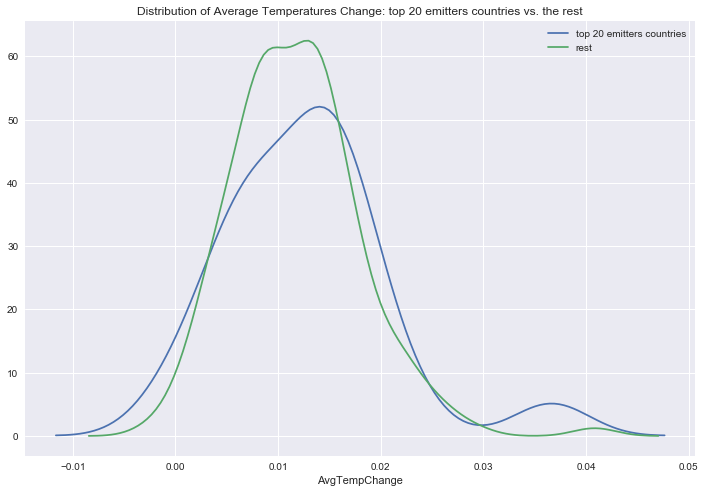

In [29]:
# compare distribution of average temperatures change between countries >80% Co2 within 2000 miles and the rest
plt.figure(figsize=(12,8))
plt.title('Distribution of Average Temperatures Change: top 20 emitters countries vs. the rest')
sns.distplot(TempChangeTop20, hist=False, label='top 20 emitters countries')
sns.distplot(TempChangeRest, hist=False, label='rest');

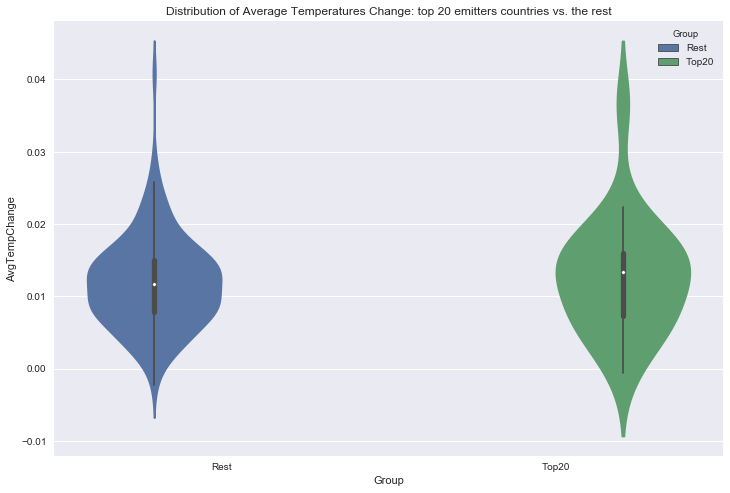

In [31]:
# compare distribution of temperatures in 1990 and 2010
plt.figure(figsize=(12,8))
plt.title('Distribution of Average Temperatures Change: top 20 emitters countries vs. the rest')
sns.violinplot(x='Group', y='AvgTempChange', hue='Group', data=df_comb);

### Hypothesis Testing

In [32]:
ttest_ind(TempChangeTop20, TempChangeRest)

Ttest_indResult(statistic=0.6246541002066779, pvalue=0.5330163383937434)

** FINDINGS: **
* The observed p-value is 0.62 is greate than 0.025, and we failed to reject null hypothesis that there is a difference in average temperatures change between top20 CO2 emitters countries and the rest.